# Lab : Using Convolutional Neural Networks (CNN) to identify digits

In this lab, we are going to setup a CNN to classify MNIST

## About MNIST Data

MNIST is a widely used dataset of hand written digits.

<img src="../assets/images/mnist-1.jpeg" />

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

## TF-GPU Debug
The following block tests if TF is running on GPU.

In [3]:
## This block is to tweak TF running on GPU
## You may comment this out, if you are not using GPU

## ---- start Memory setting ----
## Ask TF not to allocate all GPU memory at once.. allocate as needed
## Without this the execution will fail with "failed to initialize algorithm" error

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)
## ---- end Memory setting ----


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



## Step 1: Download Data

In [4]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# backup just in case
(train_images2, train_labels2), (test_images2, test_labels2) = tf.keras.datasets.mnist.load_data()




print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2: Data Exploration

Displaying train index =  45794
train label [45794] = 4 
------------ raw data for train_image[45794] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  64 255 128   0   0   0   0   0   0   0 191 255
  191   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 128   0   0   0   0   0   0   0 255 255
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  64 255 255 128   0   0   0   0   0   0  64 255 2

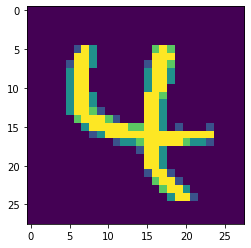

In [5]:
## Run this cell a few times to randomly display some digit data

import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])

## Step 3 : Shape Data

### 3.1 - Shape the array to 4 dimensional
ConvNets expect data in 4D.  Let's add a channel dimension to our data.

In [6]:
## Reshape to add 'channel'.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28, 1)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28, 1)
test_labels shape :  (10000,)


### 3.2 - Normalize Data
The images are stored as a 2D array of pixels.  
Each pixel is a value from 0 to 255  
We are going to normalize them in the range of 0 to 1

In [7]:
## Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
import matplotlib.pyplot as plt
import random

# index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] (just printing first 3 rows) -------".format(index))
print(train_images[index][0:2])
print ("--------------------")

# plt.imshow(train_images[index])

Displaying train index =  45794
train label [45794] = 4 
------------ raw data for train_image[45794] (just printing first 3 rows) -------
[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]
--------------------


## Step 4 : Create Model

### Neural Net Architecture

<img src="../assets/images/lenet-architecture.png" style="width:80%"/>

### 4.1 - Create a CNN

The code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to color channels, MNIST has one (because the images are grayscale), whereas a color image has three (R,G,B). In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We do this by passing the argument `input_shape` to our first layer.

In [9]:
model = tf.keras.Sequential( [ 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
None


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

### 4.2 - Add Dense layers on top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [10]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### 4.3 - Compile and Train

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  # 'adam'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Setup Tensorboard

In [12]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'cnn-mnist'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/cnn-mnist/18-23-17


## Step 6 : Train

In [13]:
%%time

epochs = 10

print ("training starting ...")
history = model.fit(train_images, train_labels, 
                    epochs=epochs, validation_split = 0.2, verbose=1,
                    callbacks=[tensorboard_callback])
print ("training done.")

training starting ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/sample - loss: 0.1480 - accuracy: 0.9537 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 2/10
48000/48000 [==============================] - 4s 80us/sample - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0467 - val_accuracy: 0.9857
Epoch 3/10
48000/48000 [==============================] - 4s 85us/sample - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0402 - val_accuracy: 0.9884
Epoch 4/10
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0467 - val_accuracy: 0.9872
Epoch 5/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0510 - val_accuracy: 0.9860
Epoch 6/10
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0419 - val_accuracy: 0.9892
Epoch 7/10
48000/48000 [=========

## Step 7 : See Training History

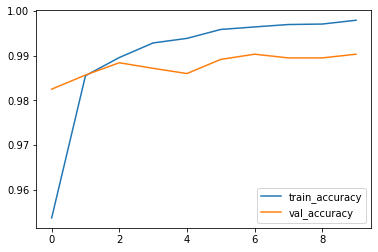

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [15]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 498 ms, sys: 28.6 ms, total: 527 ms
Wall time: 340 ms


random index =  9597
test_label[9597] = 2.  So the number is 2
prediction of test_image[9597] = [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
max softmax output =  1.0
index of max softmax output = 2.  So the prediction is same (2)


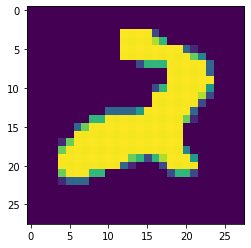

In [16]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [17]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.041
Metric : accuracy = 0.991


### 9.2 - Confusion Matrix

In [18]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [19]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  7
prediction2 1 :  2


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[ 973,    0,    1,    0,    1,    0,    3,    1,    1,    0],
       [   0, 1129,    0,    2,    0,    0,    1,    2,    1,    0],
       [   0,    0, 1025,    0,    1,    0,    0,    5,    1,    0],
       [   0,    0,    2, 1005,    0,    2,    0,    1,    0,    0],
       [   0,    0,    1,    0,  977,    0,    0,    0,    0,    4],
       [   1,    0,    1,   11,    0,  874,    2,    0,    0,    3],
       [   2,    2,    0,    0,    6,    2,  944,    0,    2,    0],
       [   0,    1,    3,    0,    0,    0,    0, 1022,    0,    2],
       [   2,    0,    1,    1,    0,    0,    0,    0,  968,    2],
       [   0,    1,    0,    0,    6,    1,    0,    6,    2,  993]])

[]

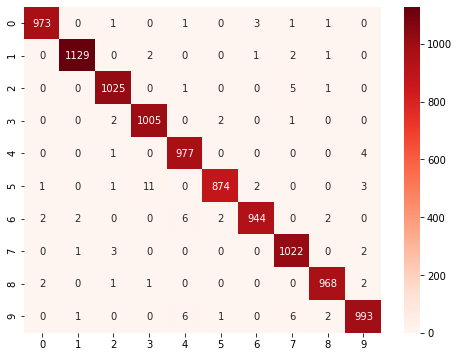

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [22]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9938712972420838,
       'precision': 0.9948875255623721,
       'recall': 0.9928571428571429,
       'support': 980},
 '1': {'f1-score': 0.9955908289241623,
       'precision': 0.9964695498676082,
       'recall': 0.9947136563876652,
       'support': 1135},
 '2': {'f1-score': 0.9922555663117135,
       'precision': 0.9912959381044487,
       'recall': 0.9932170542635659,
       'support': 1032},
 '3': {'f1-score': 0.9906357811729917,
       'precision': 0.9862610402355251,
       'recall': 0.995049504950495,
       'support': 1010},
 '4': {'f1-score': 0.9903699949315763,
       'precision': 0.9858728557013118,
       'recall': 0.994908350305499,
       'support': 982},
 '5': {'f1-score': 0.987012987012987,
       'precision': 0.9943117178612059,
       'recall': 0.9798206278026906,
       'support': 892},
 '6': {'f1-score': 0.989517819706499,
       'precision': 0.9936842105263158,
       'recall': 0.9853862212943633,
       'support': 958},
 '7': {'f1-score': 0.

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 10
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?